# 使用线性回归分类


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 
%matplotlib inline

In [3]:
scores = [[1], [1], [2], [2], [3], [3], [3], [4], [4], [5],
          [6], [6], [7], [7], [8], [8], [8], [9], [9], [10]]
passed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]

Text(0, 0.5, 'passed')

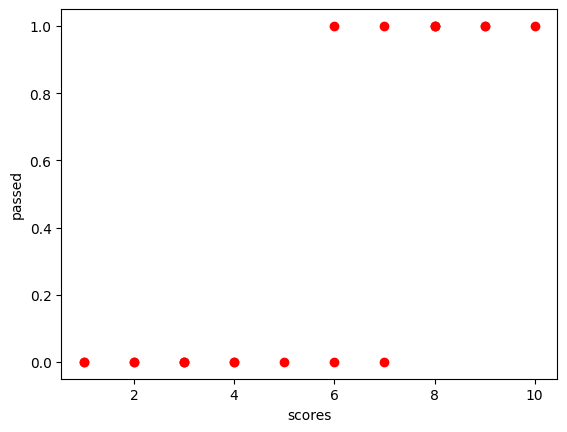

In [4]:
plt.scatter(scores,passed,color = 'r')
plt.xlabel("scores")
plt.ylabel('passed')

In [5]:
model = LinearRegression()
model.fit(scores,passed)
model.coef_,model.intercept_

(array([0.1446863]), -0.36683738796414833)

Text(0, 0.5, 'passed')

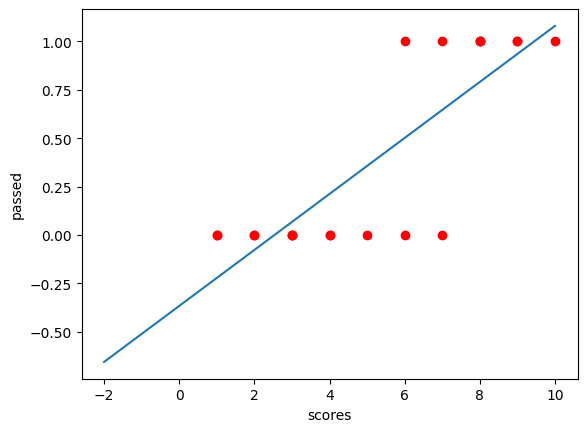

In [6]:
x = np.linspace(-2,10,100)
plt.plot(x,model.coef_[0]*x+model.intercept_)
plt.scatter(scores,passed,color = 'r')
plt.xlabel("scores")
plt.ylabel('passed')

# sigmoid分布函数

In [7]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

Text(0, 0.5, 'y')

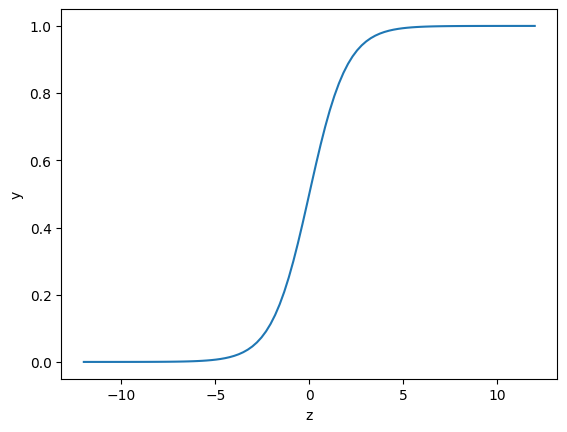

In [8]:
z = np.linspace(-12,12,100)
plt.plot(z,sigmoid(z))
plt.xlabel("z")
plt.ylabel("y")


章节前面的例子中，实验通过线性回归去完成分类问题。

发现拟合后的线性函数的 $y$ 值介于 $(-\infty,+\infty)$ 之间。其中提到了Sigmoid函数，这里又要引入一条数学定义。如果一组连续随机变量符合Sigmoid函数样本分布，就称作为逻辑分布。逻辑分布是概率论中的定理步骤，这里考虑将二者结合起来，即将线性函数拟合的结果使用Sigmoid函数压缩到 $(0,1)$ 之间

在逻辑回归中，定义：
$$
z_i = w_0x_0 + w_1x_1 + \cdots + w_ix_i = w^T x \tag{3a}
$$
$$
f(z_i) = \frac{1}{1+e^{-z_i}} \tag{3b}
$$
公式(3)中，我们对每一个特征乘上系数$w$,然后通过$Sigmoid$函数计算$f(z)$值得到概率。其中，$z$可以被看作是分类边界。所以：   
$$
h_w(x) = f(w^T x) = \frac{1}{1+e^{-w^T x}} \tag{4}
$$
由于目标值$y$只有0和1两个值，那么如果记$y=1$的概率为 $h_w(x)$ ,则此时$y=0$的概率为 $1-h_w(x)$ 。那么，我们可以记作逻辑回...
$$
P(Y=y|x) = 
\begin{cases}
h_w(x), & y=1 \\
1-h_w(x), & y=0
\end{cases} \tag{5}
$$

公式$(5)$不方便计算，其可等价写为似然函数：
$$
P(y|x;w) = (h_w(x))^y (1-h_w(x))^{1-y} \tag{6}
$$

你可以验证公式$(6)$的含义为，当$y=1$时，概率为 $h_w(x)$ ;$y=0$时，概率为 $1-h_w(x) $。

上面我们只是拿一个样本举例，对于i个样本的总概率而言实际上可以看作单样本概率的乘积，记为 $L(ω)$ :
$$
L(w) = \prod_{i=1}^m \left( h_w(x^{(i)}) \right)^{y^{(i)}} \left( 1-h_w(x^{(i)}) \right)^{1-y^{(i)}} \tag{7}
$$

由于连乘表示起来非常复杂，我们应用数学技巧，即两边取对数将连乘转换为连加的形式，即：
$$
\ln L(w) = \sum_{i=1}^m \left[ y^{(i)}\ln h_w(x^{(i)}) + (1-y^{(i)})\ln(1-h_w(x^{(i)})) \right] \tag{8}
$$
**对数损失函数**

实际上，公式(8)被称为对数似然函数，该函数衡量了事件发生的总概率。根据最大似然估计原理，只需要通过对L(w)求最大值，即得到$w$的估计值。而在机器学习问题中，我们需要一个损失函数，并通过求其最小值来进行参数优化。所以，对数似然函数取负数就可以被作为逻辑回归的对数损失函数：
$$
J(w) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)}\ln h_w(x^{(i)}) + (1-y^{(i)})\ln(1-h_w(x^{(i)})) \right] \tag{9}
$$
为了衡量整个数据集上的平均损失，所以公式(9)在全部样本上求取了平均值，构成逻辑回归最终的对数损失函数。此时，你可能会想到这其实是有数学依据的。我们设置损失函数的目的是接下来通过最优化方法求得损失函数的最小值，损失最小即代表模型最优。


这其实是有数学依据的。我们设置损失函数的目的是接下来通过最优化方法求得损失函数的最小值，损失最小即代表模型最优。在最优化求解中，只有  凸函数 往往才能求得全局最小值，非凸函数往往得到的是局部最优。然而，平方损失函数用于逻辑回归求解时得到的是非凸函数，即大多数情况下无法求得全局最优。这里使用了对数损失函数就避免了这个问题

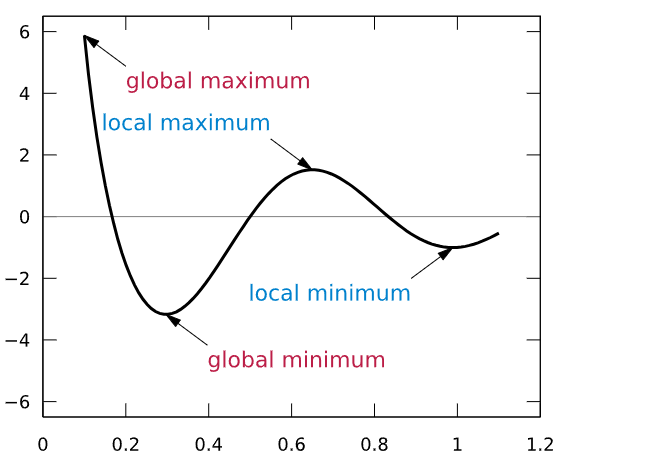   
如上所示的非凸函数中，存在全局最小值 Global Minimum 和局部最小值 Local Minimum。

上面，我们已经成功定义并实现了对数损失函数。所以，现在离求解最优参数只有一步之遥了，那就是求得损失函数的极小值。

为了求解公式$(9)$ 的极小值，这里引入一种叫「梯度下降」的求解方法。梯度下降法是一种十分常用且经典的最优化算法，通过这种方法我们就能快速找到函数的最小值。下面将讲解梯度下降法的原理，希望你能认真理解，后面的许多内容都会运用到梯度下降方法。

要理解梯度下降，首先得清楚什么是「梯度」？梯度是一个向量，梯度的方向指向函数值增加最快的方向，梯度的值表示函数值增加的速率。简而言之，对于一元函数而言，梯度就是指在某一点的导数。而对于多元函数而言，梯度就是指在某一点的偏导数组成的向量。

既然，函数在沿梯度方向变化最快，所以「梯度下降法」的核心就是，我们沿着梯度的反方向去寻找损失函数的极小值。过程如下图所示。
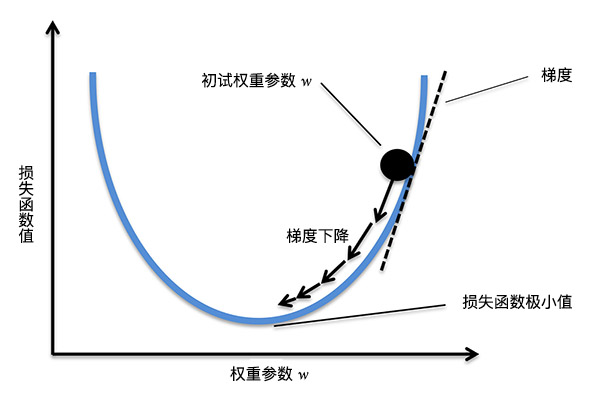

对公式$(9)$求偏导数，得到梯度，先对$(9)$进行化简先,看$log h_w(x^{(i)}$,集$4$得：
$$ \begin{align} \log (h_{w}(x^{(i)}) & = \log(f({w^T}x^{(i)})) \ & = \log(\frac{1}{1+e^{-w^Tx^{(i)}}})\ & = -\log(1+e^{-w^Tx^{(i)}}) \tag{10}\ \end{align} $$
同理：
$$ \begin{align} \log(1-h_{w}(x^{(i)})) & = \log(1-\frac{1}{1+e^{-w^Tx^{(i)}}})\ & = \log(\frac{e^{-w^Tx^{(i)}}}{1+e^{-w^Tx^{(i)}}})\ & = \log(e^{-w^Tx^{(i)}})-\log(1+e^{-w^Tx^{(i)}})\ & = -w^Tx^{(i)}-\log(1+e^{-w^Tx^{(i)}}) \tag{11}\ \end{align} $$

把$(10)$带入$(9)$:
\begin{align}
J(w) 
&= -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)}(-\log(1+e^{-w^T x^{(i)}})) + (1-y^{(i)})(-w^T x^{(i)}-\log(1+e^{-w^T x^{(i)}})) \right] \\
&\color{blue}{= -\frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log(1+e^{-w^T x^{(i)}}) - (1-y^{(i)})\left(w^T x^{(i)}+\log(1+e^{-w^T x^{(i)}})\right) \right]} \\
&= -\frac{1}{m} \sum_{i=1}^m \left[ -w^T x^{(i)} - \log(1+e^{-w^T x^{(i)}}) + w^T x^{(i)} y^{(i)} \right] \tag{展开线性项} \\
&\color{red}{= -\frac{1}{m} \sum_{i=1}^m \left[ -\log(e^{w^T x^{(i)}}) - \log(1+e^{-w^T x^{(i)}}) + w^T x^{(i)} y^{(i)} \right]} \tag{$\log(e^x)=x$} \\
&= -\frac{1}{m} \sum_{i=1}^m \left[ -\log\left(e^{w^T x^{(i)}}(1+e^{-w^T x^{(i)}})\right) + w^T x^{(i)} y^{(i)} \right] \tag{对数乘积法则} \\
&= -\frac{1}{m} \sum_{i=1}^m \left[ -\log(e^{w^T x^{(i)}}+1) + w^T x^{(i)} y^{(i)} \right] \tag{12} \quad \text{（最终简化）}
\end{align}



\begin{align}
\frac{\partial J}{\partial w} 
&= -\frac{1}{m} \sum_{i=1}^m \left[ -\frac{x^{(i)}e^{w^T x^{(i)}}}{e^{w^T x^{(i)}} + 1} + x^{(i)}y^{(i)} \right] \\
&= -\frac{1}{m} \sum_{i=1}^m \left[ -\frac{e^{w^T x^{(i)}}}{e^{w^T x^{(i)}} + 1} + y^{(i)} \right] x^{(i)} \\
&= -\frac{1}{m} \sum_{i=1}^m \left[ -\frac{e^{-w^T x^{(i)}} e^{w^T x^{(i)}}}{e^{-w^T x^{(i)}} (e^{w^T x^{(i)}} + 1)} + y^{(i)} \right] x^{(i)} \\
&= -\frac{1}{m} \sum_{i=1}^m \left[ -\frac{1}{1 + e^{-w^T x^{(i)}}} + y^{(i)} \right] x^{(i)} \tag{13}
\end{align}


把$(4)$带入$(13)$
$$
\frac{\partial J}{\partial w} = -\frac{1}{m} \sum_{i=1}^{m} \left[ -h_{wi}(x^{(i)}) + y^{(i)} \right] x^{(i)} \tag{14}$$

$$\frac{\partial J}{\partial w} = \frac{1}{m} x^T (h_w(x) - y) \tag{15}$$

梯度下降法的权重更新公式
$$w \leftarrow w - \alpha \frac{\partial J}{\partial w} \tag{16}$$

In [10]:
def gradient(X, h, y):
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient

# 罗辑回归python实现

In [11]:
df = pd.read_csv(
    "https://labfile.oss.aliyuncs.com/courses/1081/course-8-data.csv", header=0)  # 加载数据集
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


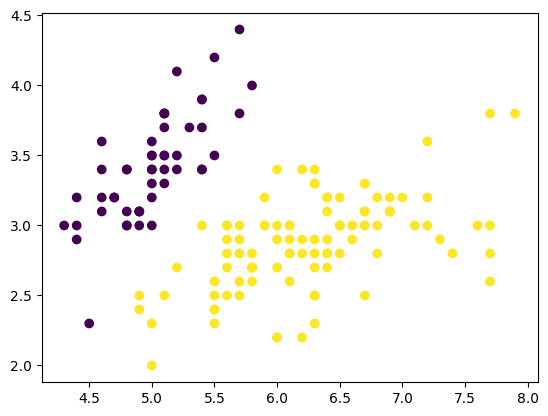

In [ ]:
plt.scatter(df["X0"],df["X1"],c = df['Y']) # c是值，0或1
# 蓝色是0，是蓝色是1

In [16]:
def sigmod(z):
    return 1/(1+np.exp(-z))

In [ ]:
def loss(h,y):
    loss = (-y*np.log(h)-(1-y)*np.log(1-h)).mean()
    return loss

# 罗辑回归sklearn实现

`LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)`

介绍其中几个常用的参数，其余使用默认即可：

- penalty: 惩罚项，默认为 ​$L_2$正则。
- dual: 对偶化，默认为 False。
- tol: 收敛阈值，当模型参数的更新量小于 tol 时，认为模型已经收敛，停止迭代（即使没有达到 max_iter），默认值为 0.0001。
- fit_intercept: 默认为 True，计算截距项。
- random_state: 随机数发生器。
- max_iter: 最大迭代次数，默认为 100

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
x = df[['X0',"X1"]].values
y = df["Y"].values
lr = 0.01
num_iter = 30000
model.fit(x,y)
model.coef_,model.intercept_

(array([[ 3.40541982, -3.15987559]]), array([-8.4429405]))

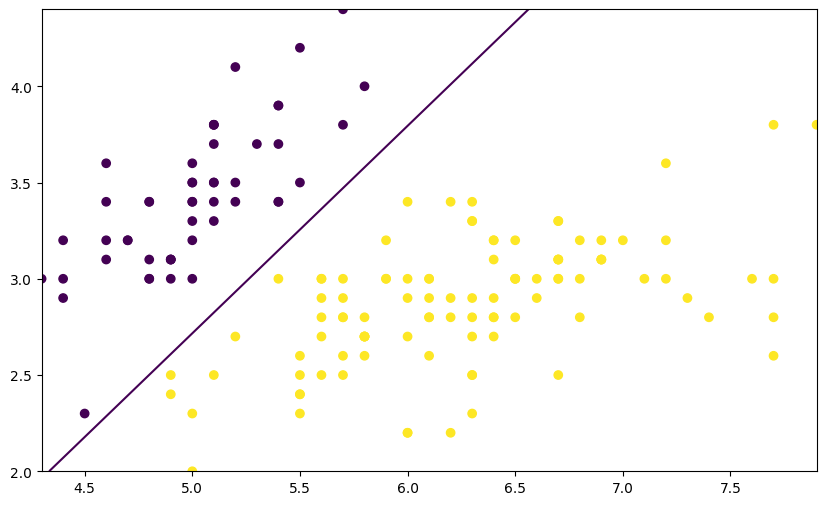

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df['X0'],df['X1'],c = df['Y'])
x1_min,x1_max = df['X0'].min(),df['X0'].max()
x2_min,x2_max = df['X1'].min(),df['X1'].max()
xx1,xx2 = np.meshgrid(np.linspace(x1_min,x1_max),np.linspace(x2_min,x2_max))
xx1,xx2
grid = np.c_[xx1.ravel(),xx2.ravel()]
probs = (np.dot(grid,model.coef_.T)+model.intercept_).reshape(xx1.shape)
plt.contour(xx1,xx2,probs,levels=[0])

In [30]:
model.score(x, y)

1.0